In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
retail= pd.read_csv('retail_clean.csv')
retail.head()

,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


**RECENCY (R)**

In [3]:
retail['InvoiceDate']= pd.to_datetime(retail['InvoiceDate'])
retail['date']= retail['InvoiceDate'].dt.strftime('%Y-%m-%d')
retail['date']= pd.to_datetime(retail['date'])
retail.head()

,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,date
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12-01
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009-12-01
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009-12-01


In [4]:
max_date = retail['date'].max()
max_date

Timestamp('2011-12-08 00:00:00')

In [6]:
customers_recency = retail.groupby('Customer ID').agg(last_date= ('date','max')).reset_index()
customers_recency['recency'] = (max_date- customers_recency['last_date']).dt.days
customers_recency.head()

,Customer ID,last_date,recency
0,12346.0,2011-01-18,324
1,12347.0,2011-12-07,1
2,12348.0,2011-09-25,74
3,12349.0,2011-11-21,17
4,12350.0,2011-02-02,309


**FREQUENCY (F)**

In [7]:
freq2 = retail.groupby('Customer ID').date.count().reset_index()
freq2.columns = ['Customer ID','frequency']

freq2.head()

,Customer ID,frequency
0,12346.0,34
1,12347.0,222
2,12348.0,51
3,12349.0,175
4,12350.0,17


**MONETARY (M)**

In [9]:
monet1 = retail.groupby(['Customer ID','Invoice']).agg(revenue= ('Revenue','sum')).reset_index()
monet1.head()

,Customer ID,Invoice,revenue
0,12346.0,491725,45.0
1,12346.0,491742,22.5
2,12346.0,491744,22.5
3,12346.0,492718,22.5
4,12346.0,492722,1.0


In [10]:
monet2 = monet1.groupby('Customer ID').agg(monetary= ('revenue','mean')).reset_index()
monet2.head()

,Customer ID,monetary
0,12346.0,6463.038333
1,12347.0,615.191250
2,12348.0,403.880000
3,12349.0,1107.172500
4,12350.0,334.400000


**Merging All**

In [43]:
all_data = pd.merge(customers_recency, freq2, how='left', on='Customer ID')
all_data = pd.merge(all_data, monet2, how='left', on='Customer ID')
all_data.head()

,Customer ID,last_date,recency,rank_recency,frequency,freq_ranking,monetary,rank_monet
0,12346.0,2011-01-18,324,0.710289,34,0.621003,6463.038333,0.001361
1,12347.0,2011-12-07,1,0.025170,222,0.153571,615.191250,0.105782
2,12348.0,2011-09-25,74,0.457653,51,0.505867,403.880000,0.262755
3,12349.0,2011-11-21,17,0.189541,175,0.197449,1107.172500,0.028401
4,12350.0,2011-02-02,309,0.699235,17,0.790306,334.400000,0.375170


**Ranking & Binning**

In [40]:
final= pd.DataFrame(customers_recency['Customer ID'])
final.head()

,Customer ID
0,12346.0
1,12347.0
2,12348.0
3,12349.0
4,12350.0


In [24]:
# >0.5 High(H) and <0.5 Low(L)

bins=[0,0.5,1]
names= ['L','H']

In [25]:
customers_recency['rank_recency'] = customers_recency['recency'].rank(pct=True)
customers_recency.head()

,Customer ID,last_date,recency,rank_recency
0,12346.0,2011-01-18,324,0.710289
1,12347.0,2011-12-07,1,0.025170
2,12348.0,2011-09-25,74,0.457653
3,12349.0,2011-11-21,17,0.189541
4,12350.0,2011-02-02,309,0.699235


In [26]:
freq2['freq_ranking'] = freq2['frequency'].rank(ascending=False, pct=True)
freq2.head()

,Customer ID,frequency,freq_ranking
0,12346.0,34,0.621003
1,12347.0,222,0.153571
2,12348.0,51,0.505867
3,12349.0,175,0.197449
4,12350.0,17,0.790306


In [27]:
monet2['rank_monet']= monet2['monetary'].rank(ascending=False,pct=True)
monet2.head()

,Customer ID,monetary,rank_monet
0,12346.0,6463.038333,0.001361
1,12347.0,615.191250,0.105782
2,12348.0,403.880000,0.262755
3,12349.0,1107.172500,0.028401
4,12350.0,334.400000,0.375170


In [41]:
final['frequency'] = pd.cut(freq2['freq_ranking'], bins, labels=names).astype('string')
final['recency'] = pd.cut(customers_recency['rank_recency'], bins, labels=names).astype('string')
final['monetary'] = pd.cut(monet2['rank_monet'], bins, labels=names).astype('string')
final.head()

,Customer ID,frequency,recency,monetary
0,12346.0,H,H,L
1,12347.0,L,L,L
2,12348.0,H,L,L
3,12349.0,L,L,L
4,12350.0,H,H,L


In [44]:
final['concat_rfm']=final['recency']+final['frequency']+final['monetary']

all_data['concat_rfm']= final['concat_rfm']
all_data.head()

,Customer ID,last_date,recency,rank_recency,frequency,freq_ranking,monetary,rank_monet,concat_rfm
0,12346.0,2011-01-18,324,0.710289,34,0.621003,6463.038333,0.001361,HHL
1,12347.0,2011-12-07,1,0.025170,222,0.153571,615.191250,0.105782,LLL
2,12348.0,2011-09-25,74,0.457653,51,0.505867,403.880000,0.262755,LHL
3,12349.0,2011-11-21,17,0.189541,175,0.197449,1107.172500,0.028401,LLL
4,12350.0,2011-02-02,309,0.699235,17,0.790306,334.400000,0.375170,HHL


**Categorizing**

In [47]:
new_dict = {'HHH': 'Core', 'HHL': 'Loyal', 'LHH': 'To be Retained', 'LHL': 'Abandoned Checkouts', 
            'HLL': 'New Customer', 'LLH': 'Luxury', 'LLL': 'Challenge', 'HLH': 'Personalised'}

In [49]:
all_data['Category'] = all_data['concat_rfm'].map(new_dict) 
all_data.head(10)

,Customer ID,last_date,recency,rank_recency,frequency,freq_ranking,monetary,rank_monet,concat_rfm,Category
0,12346.0,2011-01-18,324,0.710289,34,0.621003,6463.038333,0.001361,HHL,Loyal
1,12347.0,2011-12-07,1,0.025170,222,0.153571,615.191250,0.105782,LLL,Challenge
2,12348.0,2011-09-25,74,0.457653,51,0.505867,403.880000,0.262755,LHL,Abandoned Checkouts
3,12349.0,2011-11-21,17,0.189541,175,0.197449,1107.172500,0.028401,LLL,Challenge
4,12350.0,2011-02-02,309,0.699235,17,0.790306,334.400000,0.375170,HHL,Loyal
5,12351.0,2010-11-29,374,0.741241,21,0.742602,300.930000,0.455952,HHL,Loyal
6,12352.0,2011-11-03,35,0.311310,103,0.315561,284.984000,0.487075,LLL,Challenge
7,12353.0,2011-05-19,203,0.614371,24,0.711990,203.380000,0.678061,HHH,Core
8,12354.0,2011-04-21,231,0.635459,58,0.469388,1079.400000,0.031122,HLL,New Customer
9,12355.0,2011-05-09,213,0.623554,35,0.611565,473.805000,0.188946,HHL,Loyal


[Text(0, 0, 'Loyal'),
 Text(0, 0, 'Challenge'),
 Text(0, 0, 'Core'),
 Text(0, 0, 'New Customer'),
 Text(0, 0, 'To be Retained'),
 Text(0, 0, 'Personalised'),
 Text(0, 0, 'Luxury')]

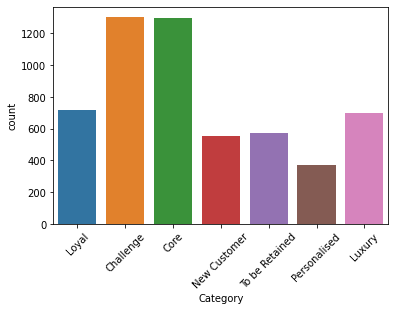

In [37]:
import seaborn as sns

fig= sns.countplot(x='Category', data = all_data)
fig.set_xticklabels(fig.get_xticklabels(), rotation=45)